In [2]:
library(SportsAnalytics)
library(ggplot2)

In [3]:
NBA1516 <- fetch_NBAPlayerStatistics("15-16")

In [4]:
str(NBA1516)

'data.frame':	476 obs. of  25 variables:
 $ League             : Factor w/ 1 level "NBA": 1 1 1 1 1 1 1 1 1 1 ...
 $ Name               : chr  "Quincy Acy" "Jordan Adams" "Steven Adams" "Arron Afflalo" ...
 $ Team               : Factor w/ 31 levels "ATL","BOS","BRO",..: 27 15 22 20 19 13 28 26 12 15 ...
 $ Position           : Factor w/ 5 levels "C","PF","PG",..: 4 5 1 5 1 1 2 2 2 5 ...
 $ GamesPlayed        : int  59 2 80 71 59 60 74 9 79 64 ...
 $ TotalMinutesPlayed : int  877 15 2019 2359 863 802 2260 37 1601 1622 ...
 $ FieldGoalsMade     : int  119 2 261 354 150 134 536 5 191 215 ...
 $ FieldGoalsAttempted: int  214 6 426 799 314 225 1045 10 370 469 ...
 $ ThreesMade         : int  19 0 0 91 0 0 0 0 0 15 ...
 $ ThreesAttempted    : int  49 1 0 238 1 0 16 0 0 42 ...
 $ FreeThrowsMade     : int  50 3 114 110 52 60 259 0 46 90 ...
 $ FreeThrowsAttempted: int  68 5 196 131 62 84 302 0 73 138 ...
 $ OffensiveRebounds  : int  65 0 218 23 75 86 175 2 162 104 ...
 $ TotalRebounds      : 

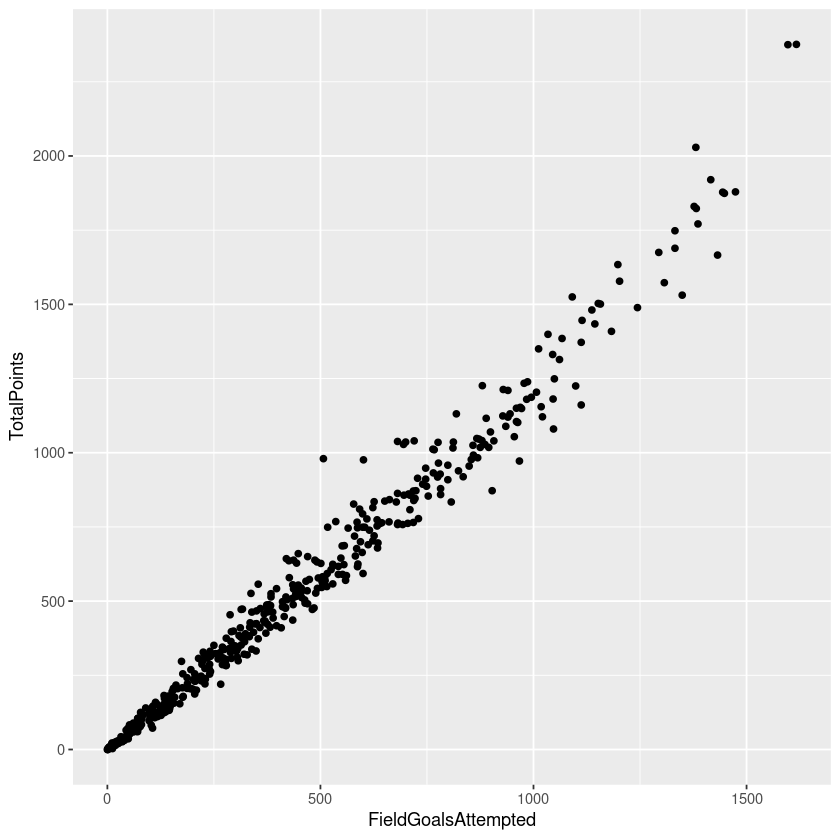

In [5]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516)

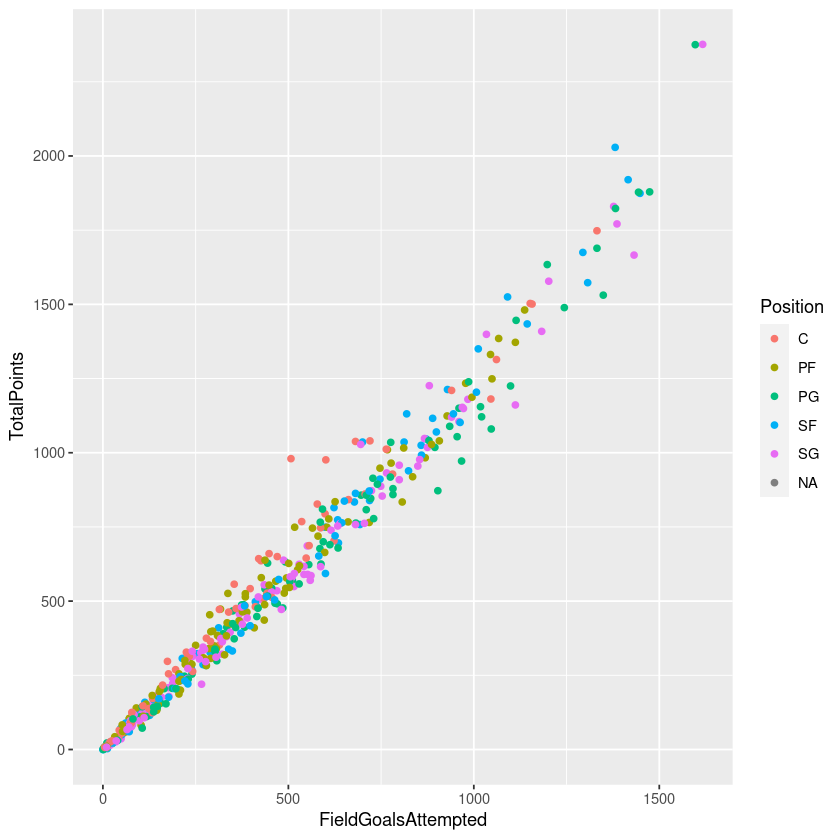

In [6]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, color = Position)

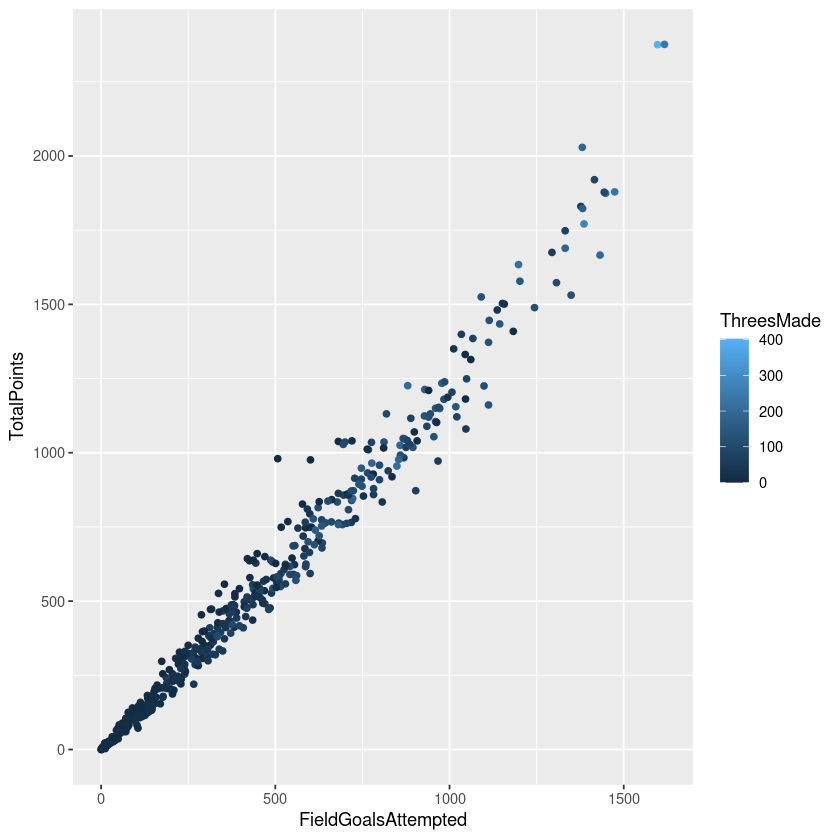

In [7]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, 
      color = ThreesMade,
     )

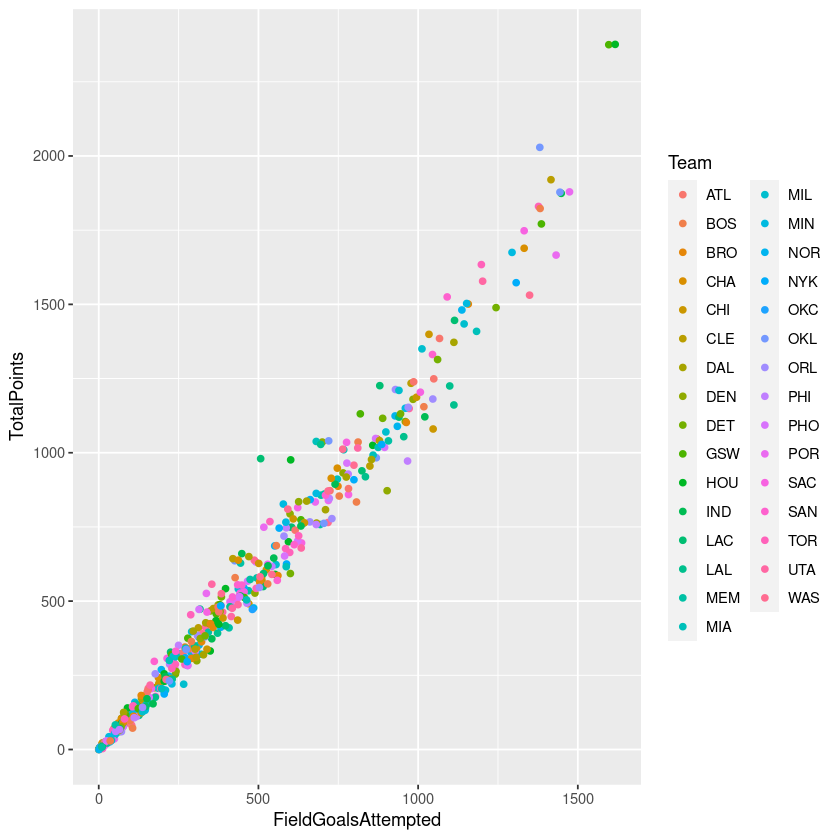

In [8]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, 
      color = Team,
     )

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



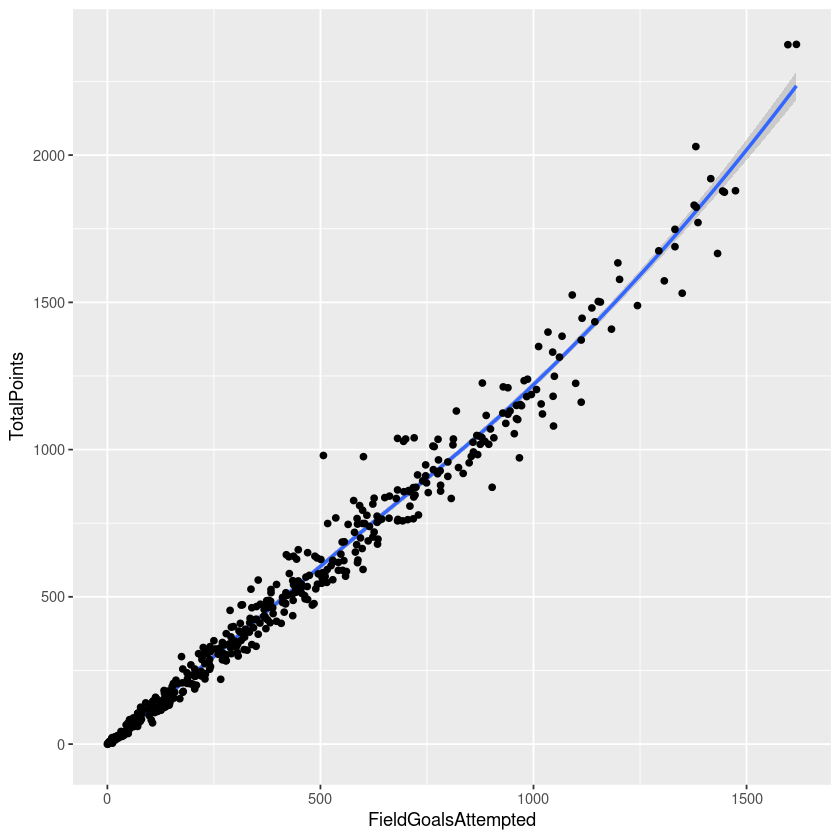

In [9]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, 
      # color = Position,
      geom = c("smooth", "point")
     )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



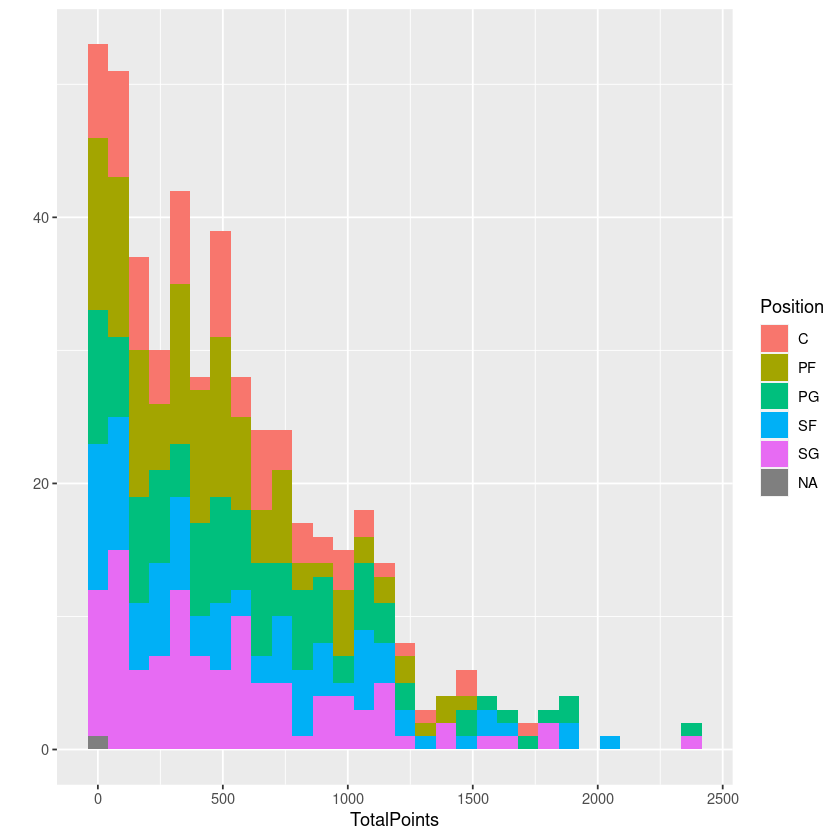

In [10]:
qplot(TotalPoints, data = NBA1516, 
      fill = Position
     )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



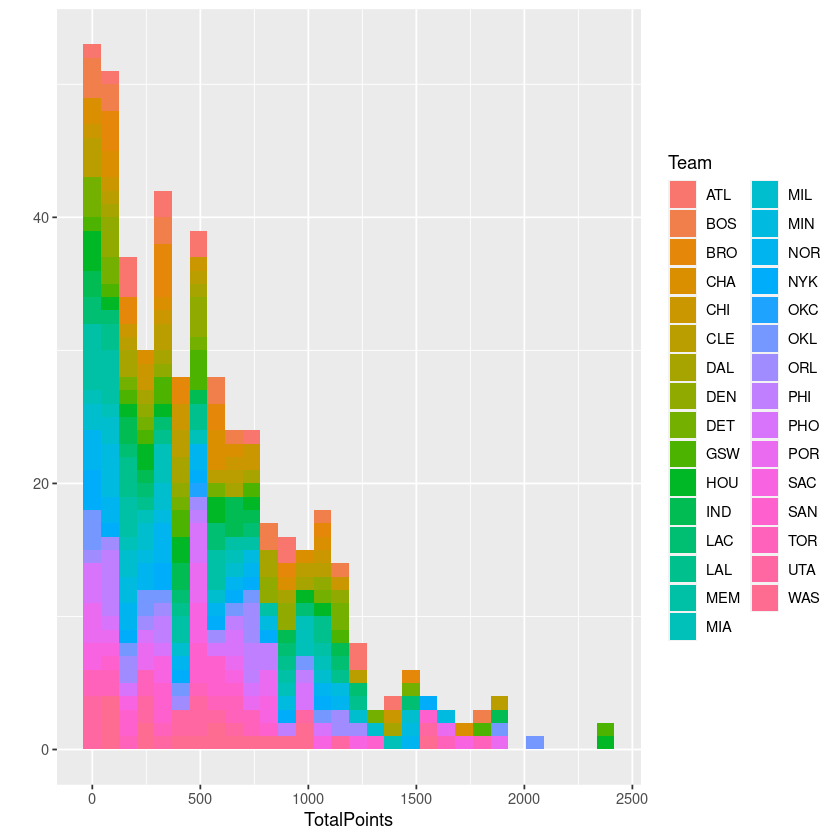

In [11]:
qplot(TotalPoints, data = NBA1516, 
      fill = Team,
     )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



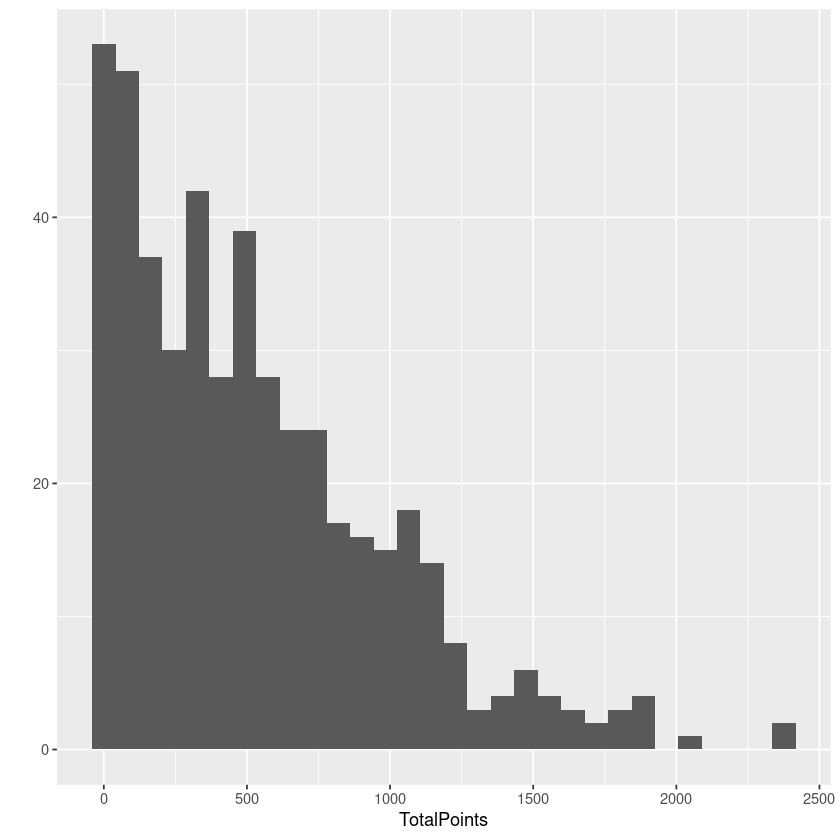

In [12]:
qplot(TotalPoints, data = NBA1516, 
      fill = FieldGoalsAttempted,
     )

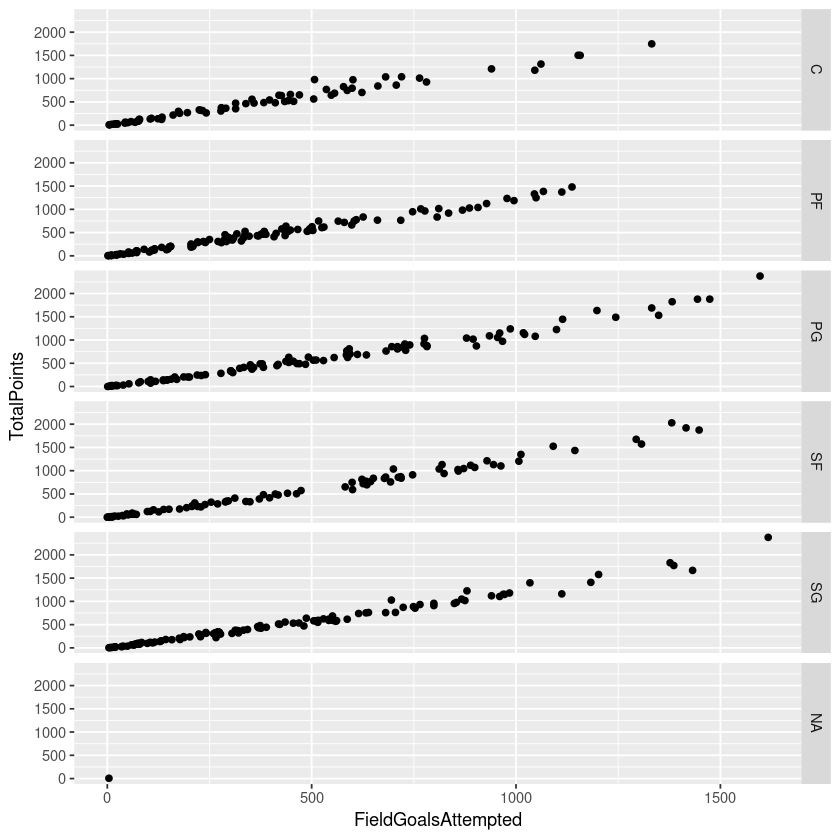

In [13]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516,
      facets = Position ~ .,
     )

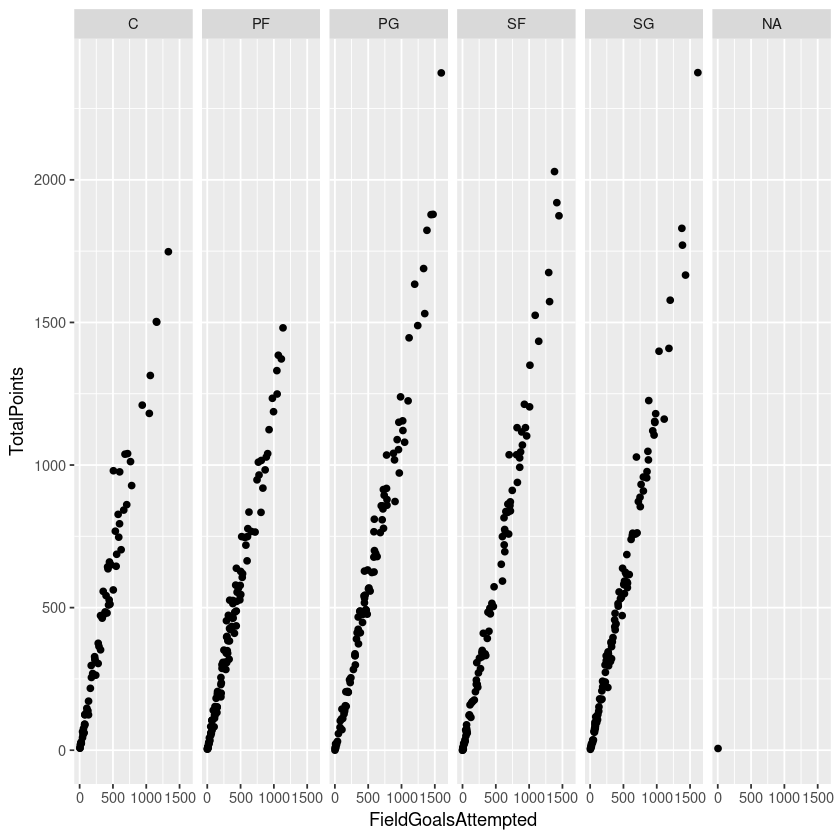

In [14]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516,
      facets = . ~ Position,
     )

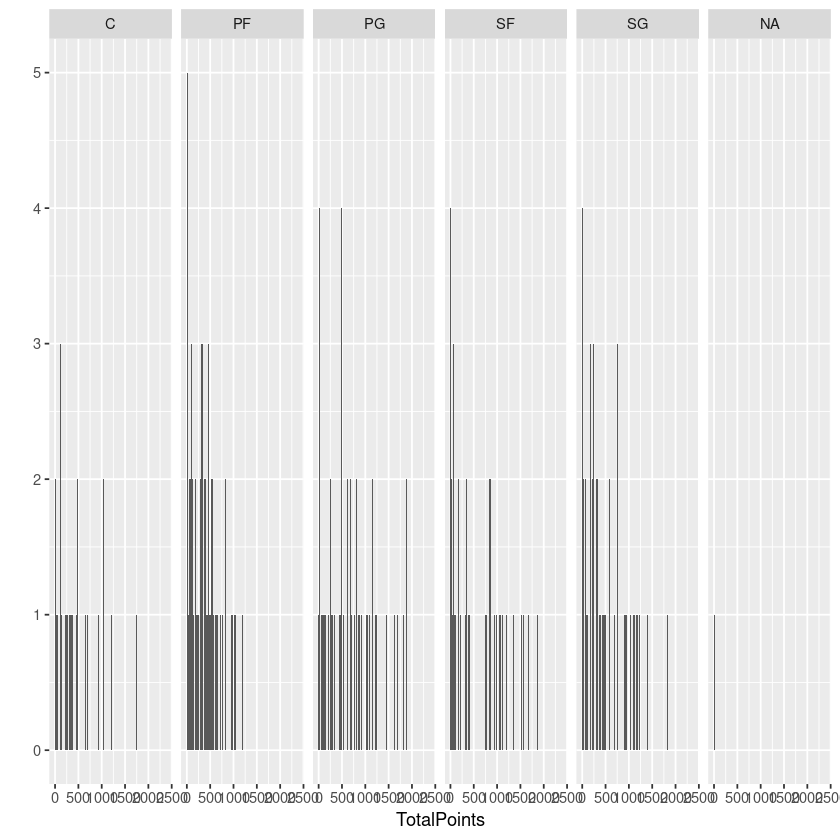

In [15]:
qplot(TotalPoints, data = NBA1516,
      facets = . ~ Position,
      binwidth = 10,
     )

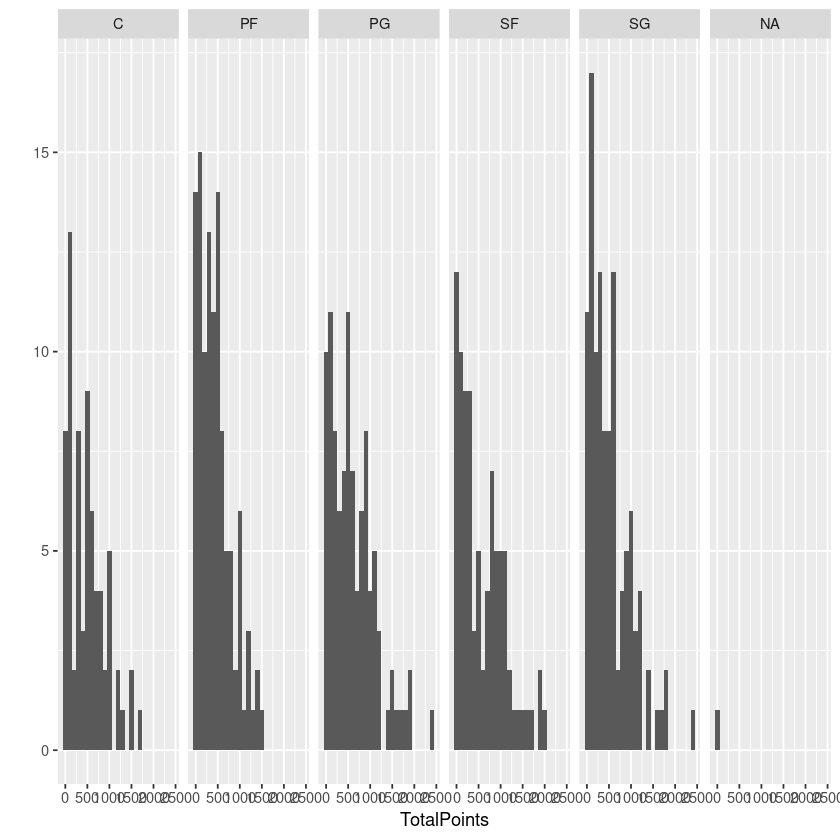

In [16]:
qplot(TotalPoints, data = NBA1516,
      facets = . ~ Position,
      binwidth = 100,
     )

In [17]:
df <- data.frame(gp = factor(rep(letters[1:3], each = 10)), y = rnorm(30))
df_plot <- ggplot(df, aes(x = gp, y = y))

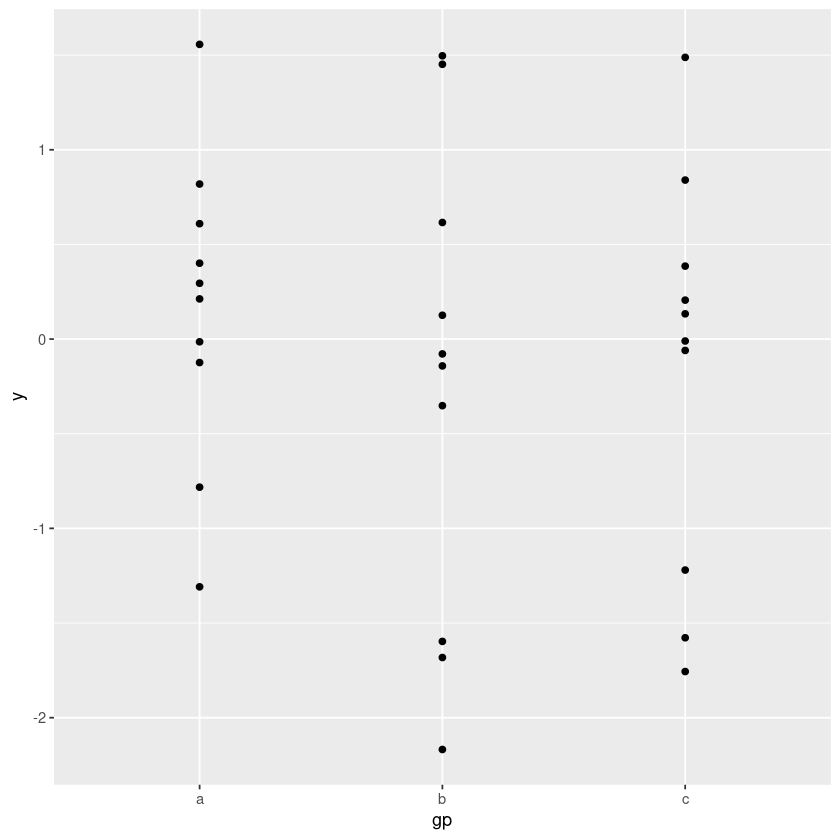

In [18]:
df_plot + geom_point()

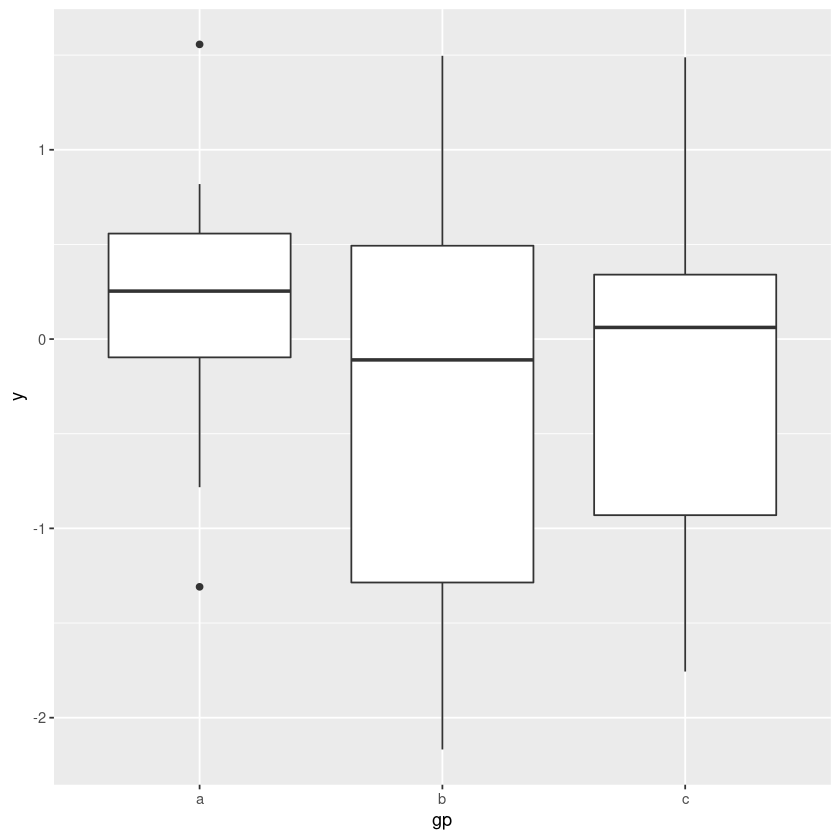

In [19]:
df_plot + geom_boxplot()

In [25]:
df$z <- df$y + rnorm(30)
df_zplot <- ggplot(df, aes(x = z, y = y))

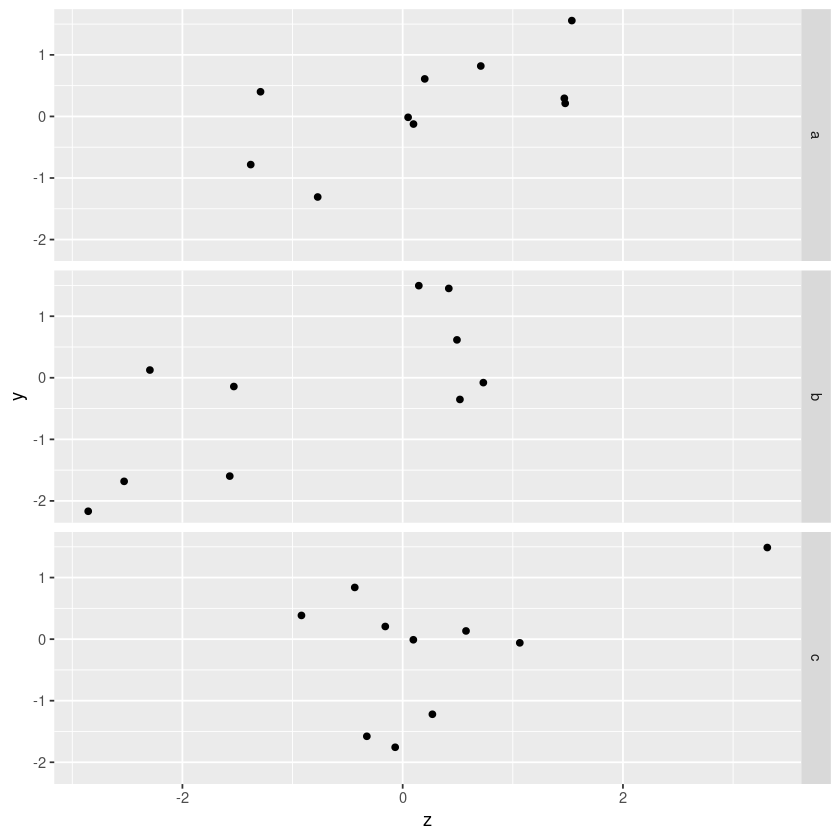

In [21]:
df_zplot + geom_point() + facet_grid(gp ~ .)

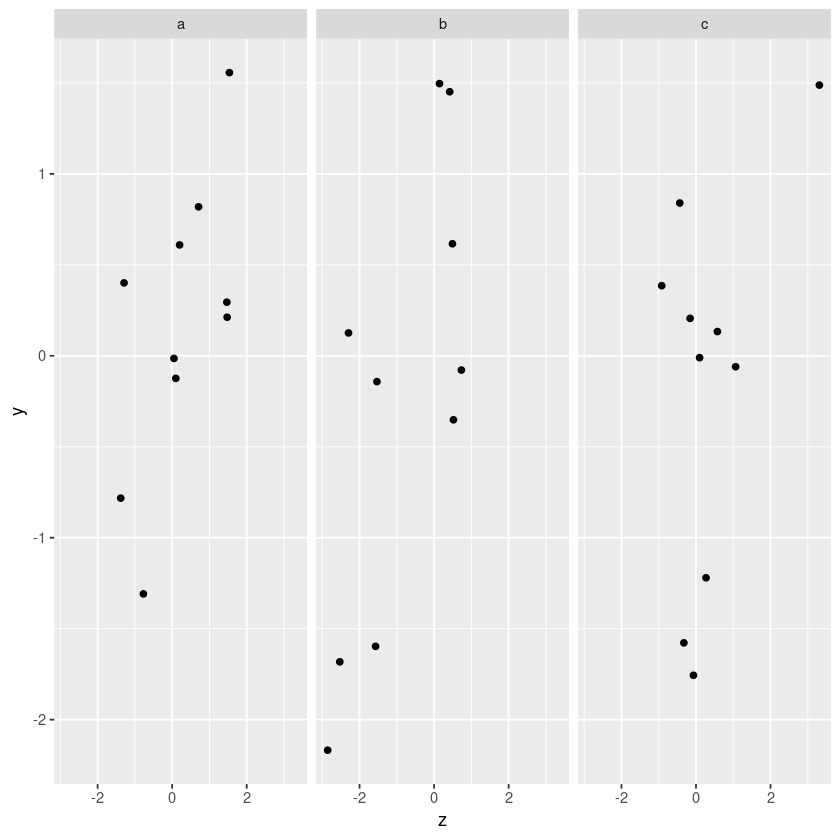

In [22]:
ggplot(df, aes(x = z, y = y)) + geom_point() + facet_grid(. ~ gp)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



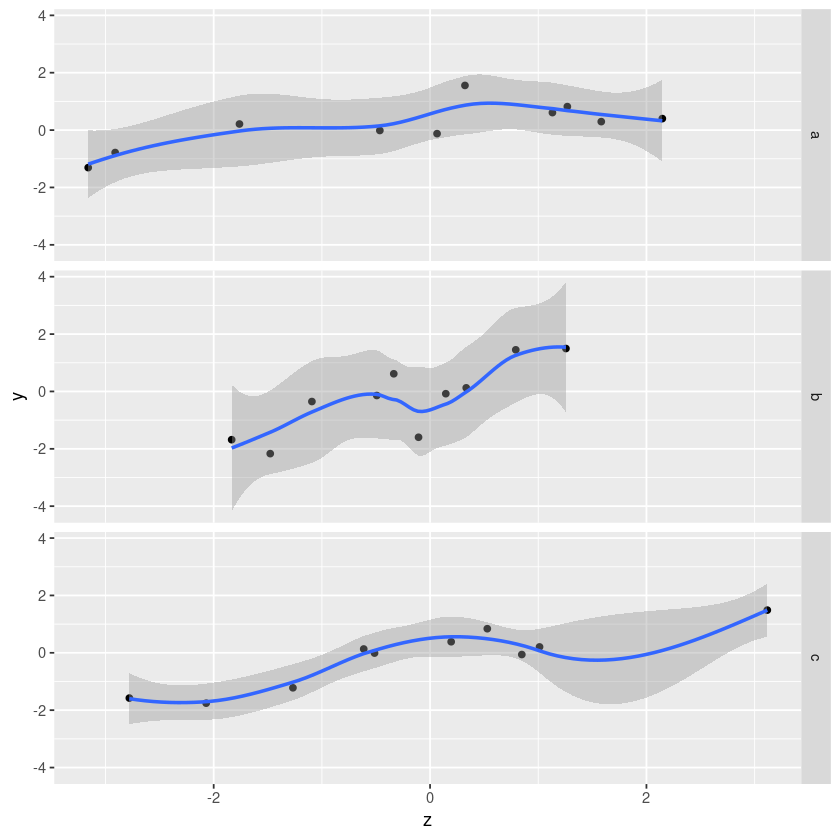

In [33]:
# 趨勢線
df_zplot + geom_point() + facet_grid(gp ~ .) + geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



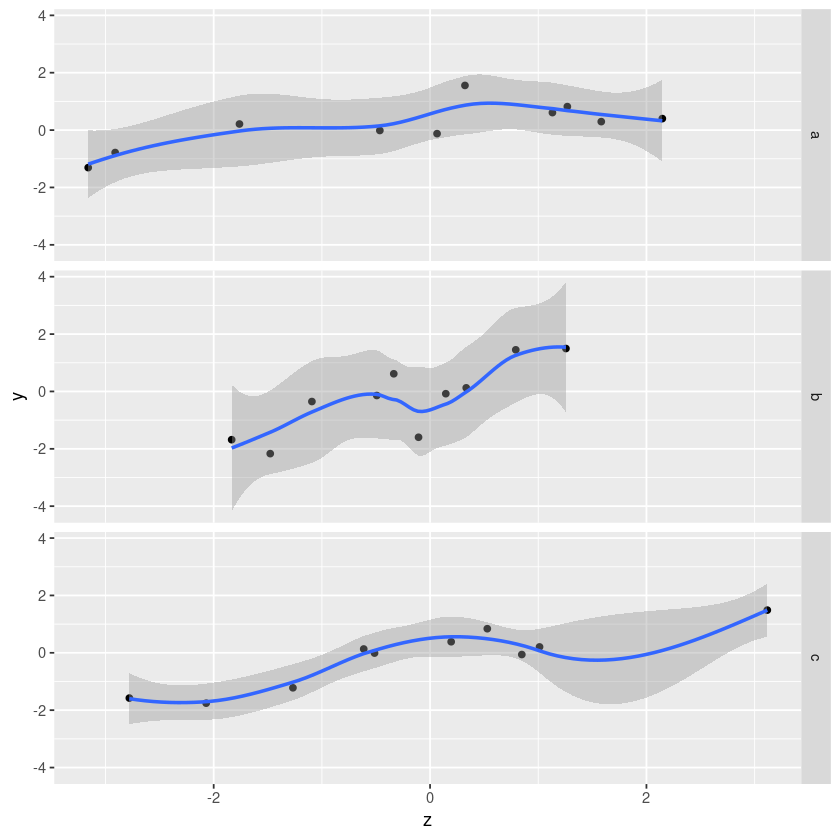

In [34]:
# 測試 smooth 有沒有交換律? 有
df_zplot + geom_point() + geom_smooth() + facet_grid(gp ~ .)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



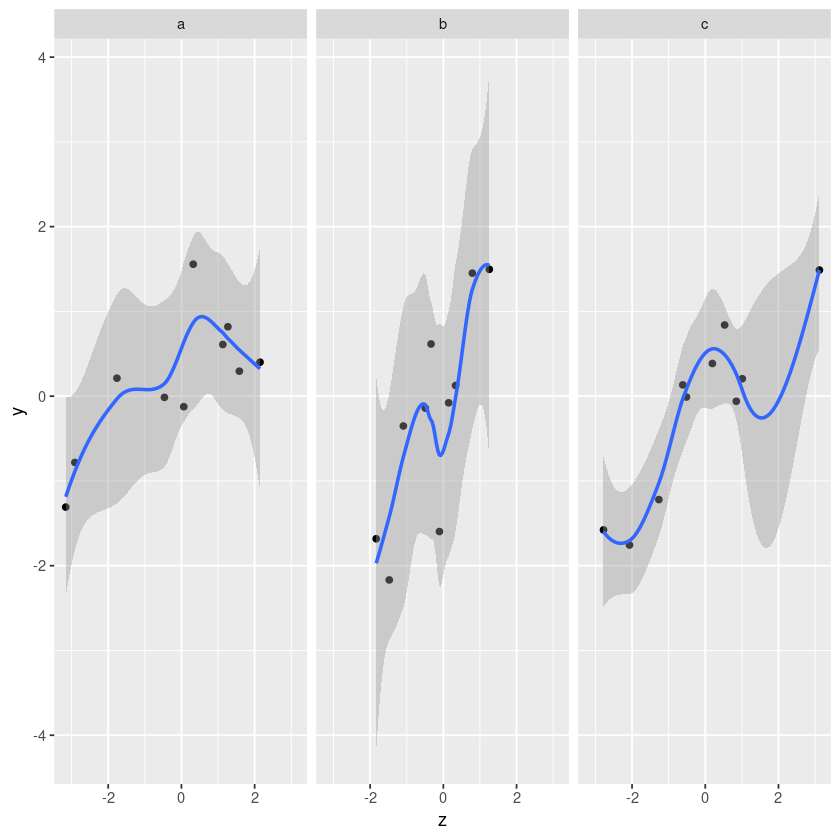

In [35]:
df_zplot + geom_point() + geom_smooth() + facet_grid(. ~ gp) 

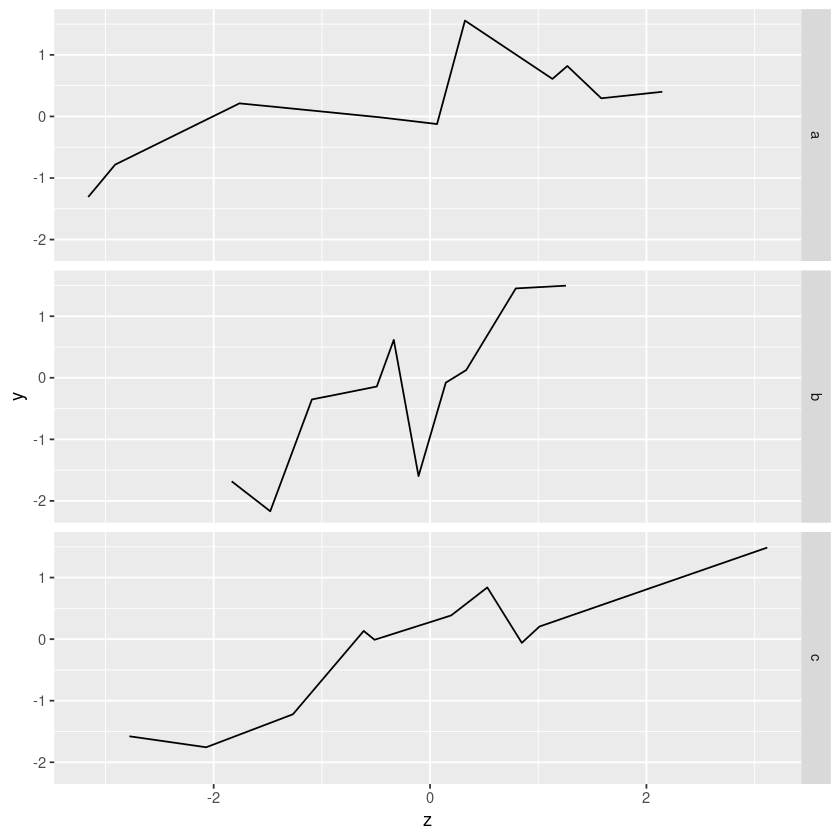

In [36]:
df_zplot + geom_line() + facet_grid(gp ~ .)

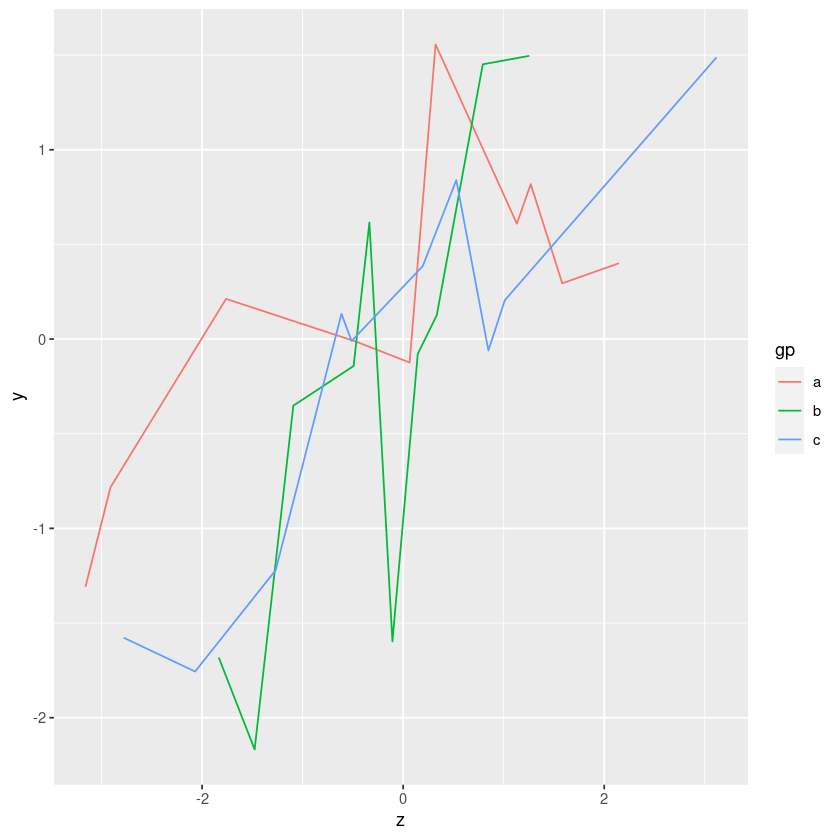

In [37]:
ggplot(df, aes(x = z, y = y, color = gp)) + geom_line()

---
# ggplot2 應用

In [39]:
library(datasets)
library(data.table)

In [50]:
airquality$Month <- as.factor(airquality$Month)
airquality.mean <- data.table(airquality)[, .(OzoneMean = mean(Ozone, na.rm = T)), by = Month] # 計算臭氧每月平均

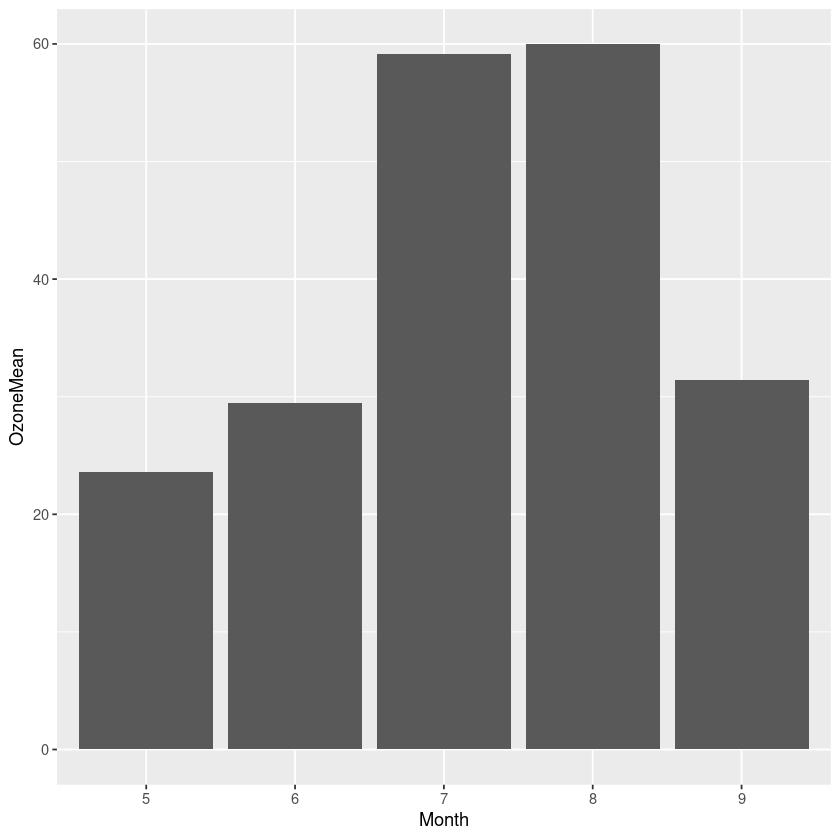

In [41]:
ggplot() + geom_bar(data = airquality.mean, aes(x = Month, y = OzoneMean), stat = "identity")

In [67]:
airquality$Month <- as.factor(airquality$Month)
# airquality.mean <- data.table(airquality)[, .(OzoneMean = mean(Ozone, na.rm = T), OzoneSD = sd(Ozone, na.rm = T)), by = Month] # 計算臭氧每月平均
airquality.stat <- data.table(airquality)[,
                                          .(
                                              OzoneMean = mean(Ozone, na.rm = T),
                                              OzoneSD = sd(Ozone, na.rm = T)
                                          ),
                                          by = Month
                                         ] # 計算臭氧每月平均

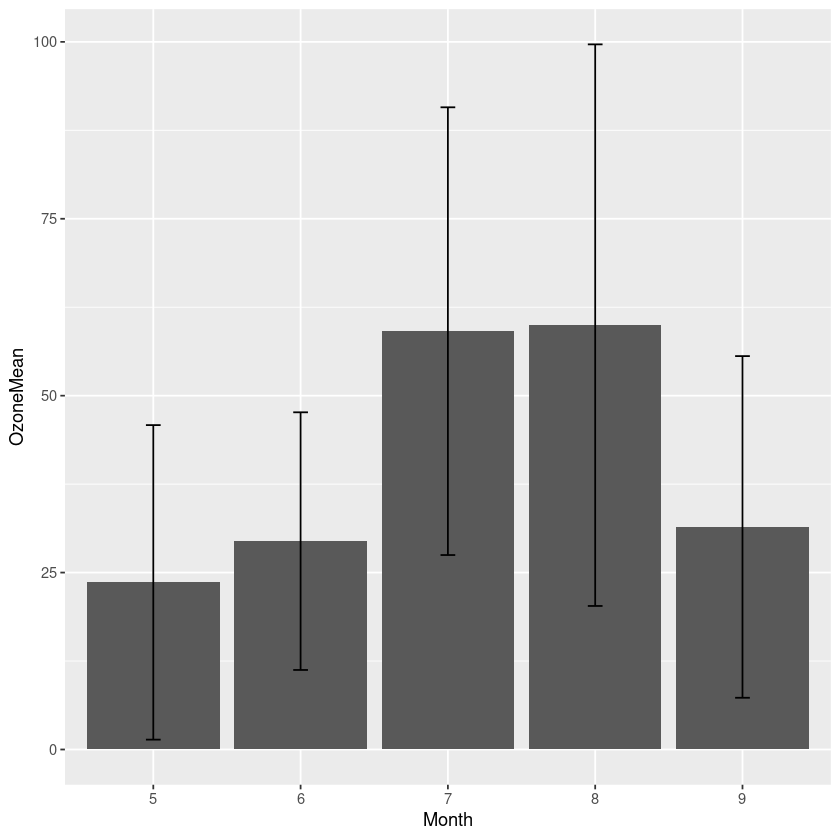

In [68]:
ggplot(data = airquality.stat) +
    geom_bar(aes(x = Month, y = OzoneMean), stat = "identity") +
    geom_errorbar(
        # ymin 低點, ymax 高點
        aes(x = Month, ymin = OzoneMean - OzoneSD, ymax = OzoneMean + OzoneSD),
        width = 0.1
    )